In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy import stats
import dill
import time

plt.rcParams.update({
#     "figure.facecolor":  (1.0, 1.0, 1.0, 0.0),  # red   with alpha = 30%
    "axes.facecolor":    (1.0, 1.0, 1.0, 0.2),  # green with alpha = 50%
#     "savefig.facecolor": (0.0, 0.0, 1.0, 0.5),  # blue  with alpha = 20%
})

In [13]:
df = pd.read_csv('mybl_ticker.csv')#.dropna()
df.head()

date_added         gspc        vix    tnx        wti        gold  \
0  2000-09-05  1507.079956  19.820000  5.683  33.799999  275.799988   
1  2000-09-06  1492.250000  20.790001  5.712  34.950001  274.200012   
2  2000-09-07  1502.510010  19.420000  5.749  35.330002  274.000000   
3  2000-09-08  1494.500000  18.459999  5.724  33.700001  273.299988   
4  2000-09-11  1489.260010  18.400000  5.758  35.099998  273.100006   

          ixic         rut           sz     bvsp        gdaxi   wheat  \
0  4143.180176  539.020020  4723.069824  17425.0  7395.069824  293.75   
1  4013.340088  536.320007  4632.689941  17590.0  7333.020020  293.75   
2  4098.350098  542.820007  4670.470215  17590.0  7373.339844  293.75   
3  3978.409912  535.700012  4700.879883  17433.0  7267.770020  293.75   
4  3896.350098  533.619995  4704.870117  17288.0  7214.450195  293.75   

            ss        bsesn  
0  1963.791992  4598.649902  
1  1925.906982  4606.350098  
2  1950.662964  4628.930176  
3  1959.312012  4668.270020  
4  1972.042969  4696.600098

In [14]:
df['wti/gold'] = df.wti/df.gold
df['wheat/gold'] = df.wheat/df.gold

In [15]:
#Подсчет t-статистики для корреляции
def t_st(x):
    t = x['cor'] * (100 - 2)**(1/2)/(1 - x['cor']**2)**(1/2)
    t1 = stats.t.ppf(0.01/2, df=100 - 2)
    t2 = stats.t.ppf(1 - 0.01/2, df=100 - 2)

    corrt = pd.DataFrame({'cor': x['cor'], 't': t, 't1': np.ones(len(t))*t1, 't2': np.ones(len(t))*t2})
    return corrt

#Построение графиков двух рядов и корреляции с t-статистиой
def grapher(x, col1, col2):
    fig, ax = plt.subplots()
    ax.set_title('x и y')
    fig.set_size_inches(50, 5)
#     lns1 = ax.plot(x.Close.rolling(window=100, center=True).mean(), label='S&P 500')
    lns1 = ax.plot(x[col1], linewidth=1, label='x')
    ax2 = ax.twinx()
    lns2 = ax2.plot(x[col2], linewidth=1, c='r', label='y')

    lns = lns1+lns2
    labs = [l.get_label() for l in lns]
    ax.legend(lns, labs, loc='upper left')

    fig, ax = plt.subplots()
    fig.set_size_inches(50, 5)
    ax.set_title('Корреляция между x и y')
    ax2 = ax.twinx()
    lns1 = ax.plot(corrt.t, label='t-значение')
    lns2 = ax.plot(corrt.t1, linestyle=':', c='k', label='границы критической области')
    lns3 = ax.plot(corrt.t2, linestyle=':', c='k')
    lns4 = ax2.plot(corrt['cor'], linewidth=1, linestyle='--', c='r', label='корреляция')
    ax2.set_frame_on(True)

    lns = lns1+lns2+lns4
    labs = [l.get_label() for l in lns]
    ax2.legend(lns, labs, loc='upper left')

    plt.show()


In [16]:
# df.date = pd.to_datetime(df.date)
# df.index = df.date
# corrt = t_st(df)
# grapher(df, 'vi', 'tr')

Коэффициент корреляции -0.23336309968079094


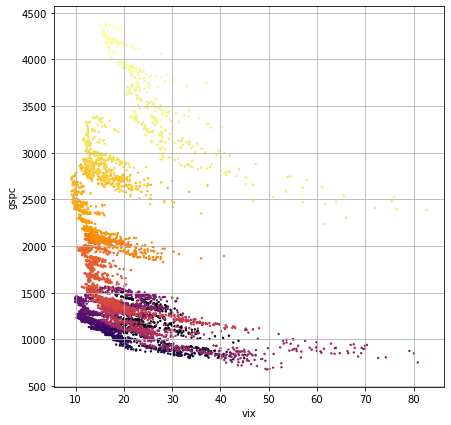

In [17]:
def scatter(col1, col2, lin):
    if lin == True:
        x = df[col1]/df[col1].max()
        y = df[col2]/df[col2].max()
    else:
        x = df[col1]
        y = df[col2]
        
    z = df.index.astype('int')/df.index.astype('int').max()
    color = [float(item) for item in z]
    plt.figure(figsize=(7,7))
#     plt.patch.set_facecolor('xkcd:grey')
    plt.scatter(x, y, s=2, c=color, cmap='inferno')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.grid(True)
    
    if lin == True:
        a = (np.sum(x)*np.sum(y) - len(x)*np.sum(x*y))/(np.sum(x)*np.sum(x) - len(x)*np.sum(x*x))
        b = (np.sum(y) - a*np.sum(x))/len(x)

        A = np.vstack([x, np.ones(len(x))]).T
        a1, b1 = np.linalg.lstsq(A, y)[0]
        print(a, b)
        print(a1, b1)
        plt.plot([0, 1], [b, a + b], c='r')
        plt.show()

    xm = np.mean(x)
    ym = np.mean(y)
    R = (np.sum((x - xm)*(y - ym)))/((np.sum((x - xm)**2)*np.sum((y - ym)**2))**(1/2))
    print('Коэффициент корреляции', R)
    plt.show()
    
scatter('vix', 'gspc', False)

In [18]:
# df.date = pd.to_datetime(df.date_added)
# df.index = df.date_added
df = df.drop('date_added', axis=1)

In [19]:
df.head(2)

gspc        vix    tnx        wti        gold         ixic  \
0  1507.079956  19.820000  5.683  33.799999  275.799988  4143.180176   
1  1492.250000  20.790001  5.712  34.950001  274.200012  4013.340088   

          rut           sz     bvsp        gdaxi   wheat           ss  \
0  539.020020  4723.069824  17425.0  7395.069824  293.75  1963.791992   
1  536.320007  4632.689941  17590.0  7333.020020  293.75  1925.906982   

         bsesn  wti/gold  wheat/gold  
0  4598.649902  0.122553    1.065083  
1  4606.350098  0.127462    1.071298

tnx_gspc
Коэффициент корреляции -0.6532611662896984


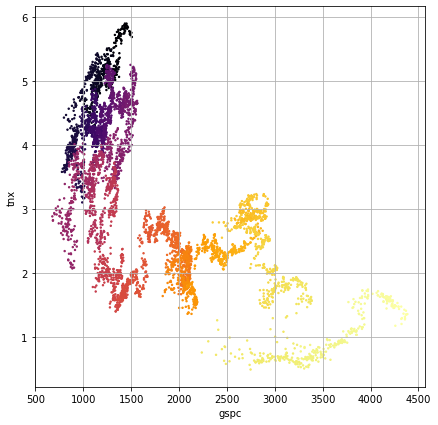

gold_gspc
Коэффициент корреляции 0.6429829263614028


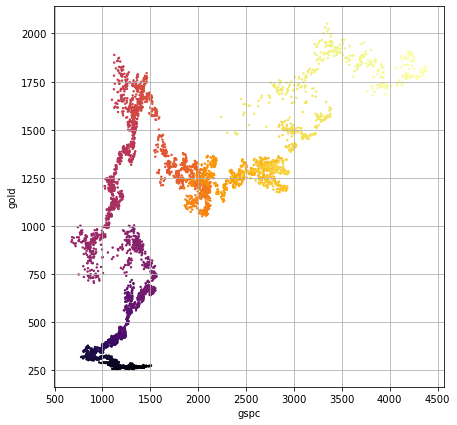

sz_gspc
Коэффициент корреляции 0.4863455278690061


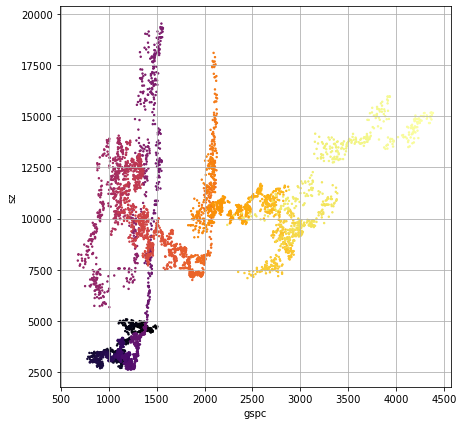

bvsp_gspc
Коэффициент корреляции 0.8184661367317426


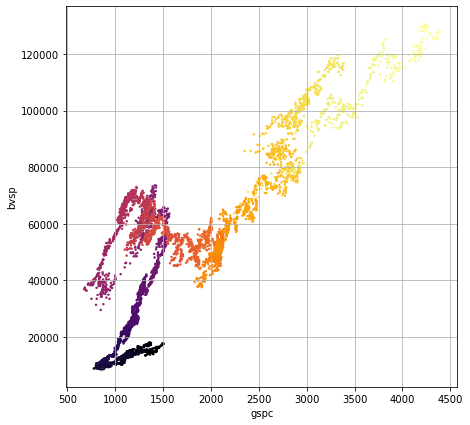

ss_gspc
Коэффициент корреляции 0.4915651173613621


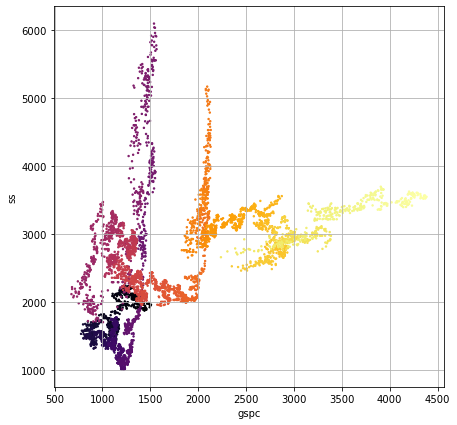

wti/gold_gspc
Коэффициент корреляции -0.6389765044716255


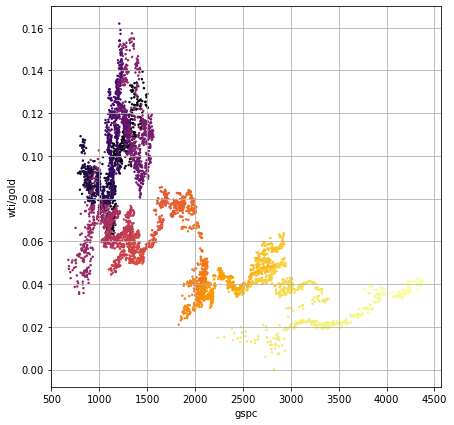

wheat/gold_gspc
Коэффициент корреляции -0.6650461665048643


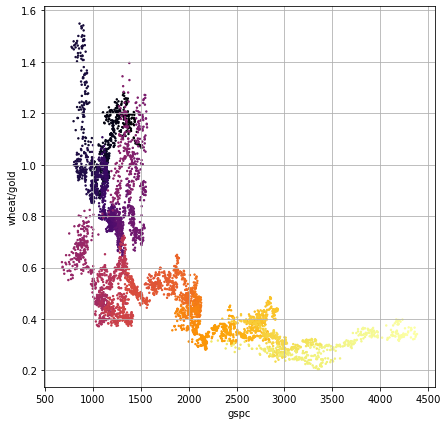

gold_tnx
Коэффициент корреляции -0.8950077331921646


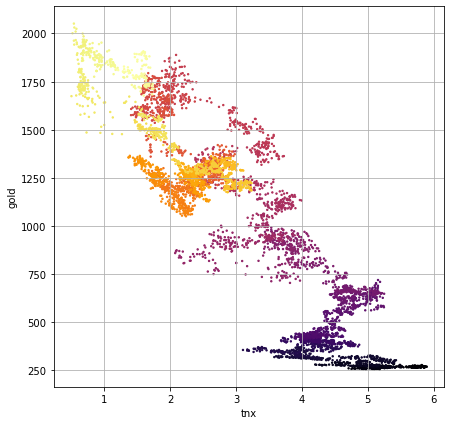

ixic_tnx
Коэффициент корреляции -0.6712625661742634


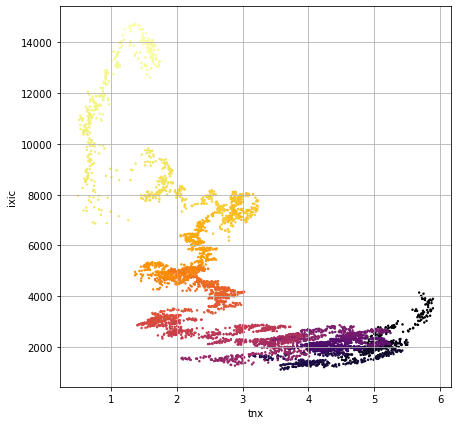

rut_tnx
Коэффициент корреляции -0.6865532601124962


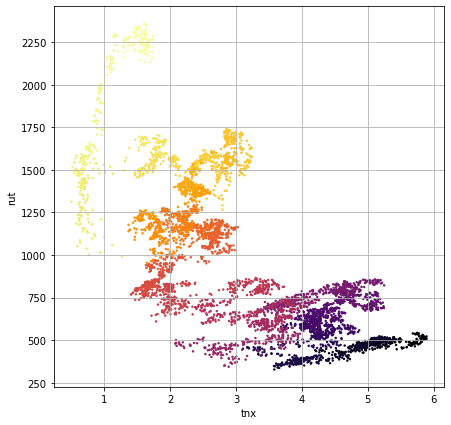

sz_tnx
Коэффициент корреляции -0.570041049505122


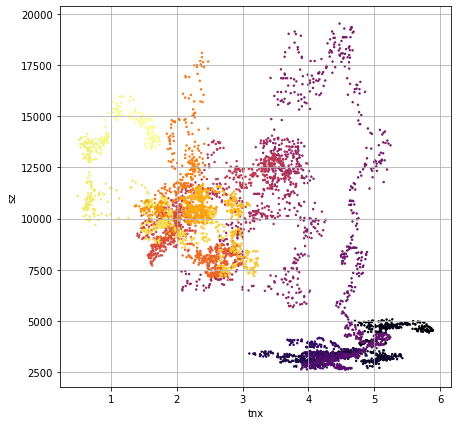

bvsp_tnx
Коэффициент корреляции -0.7109780334307018


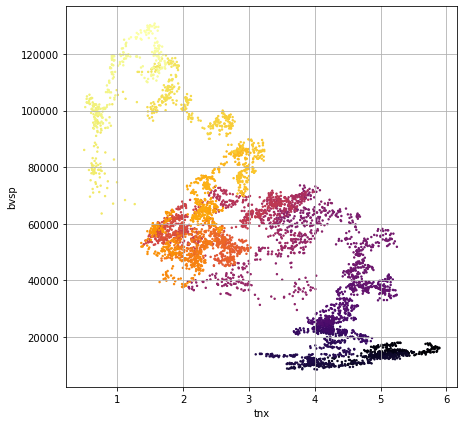

gdaxi_tnx
Коэффициент корреляции -0.6777033014926055


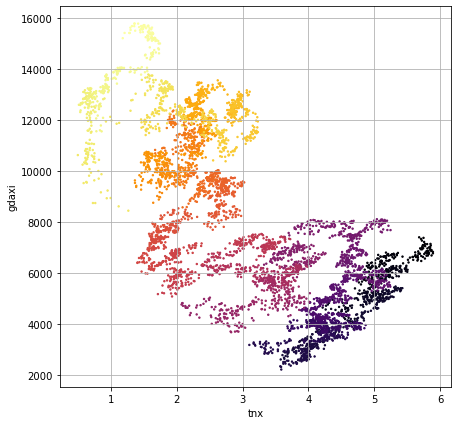

ss_tnx
Коэффициент корреляции -0.40024854102992485


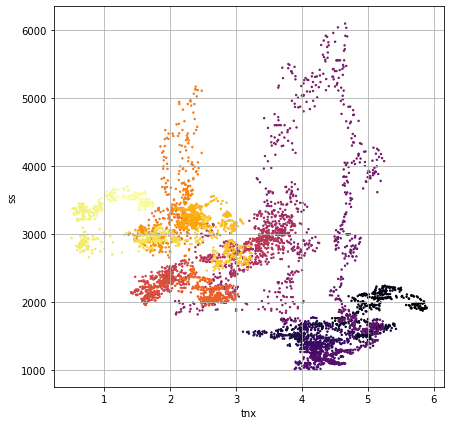

bsesn_tnx
Коэффициент корреляции -0.7766173511160105


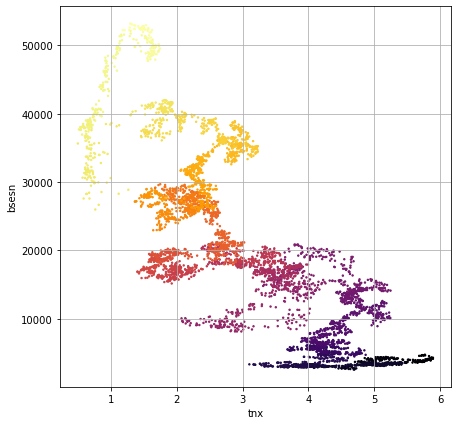

wti/gold_tnx
Коэффициент корреляции 0.8335944359836849


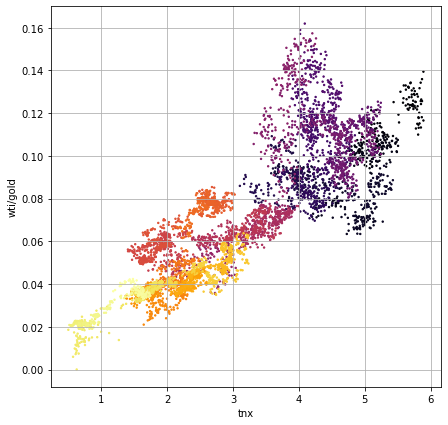

wheat/gold_tnx
Коэффициент корреляции 0.825604091926935


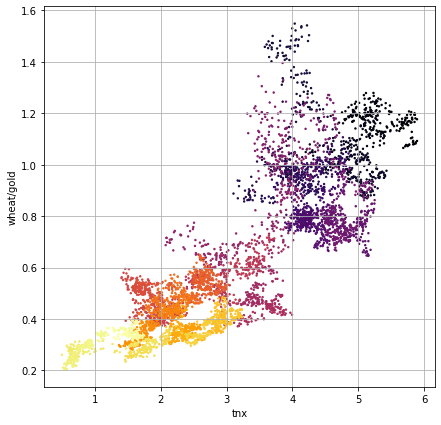

gold_wti
Коэффициент корреляции 0.4812159419805751


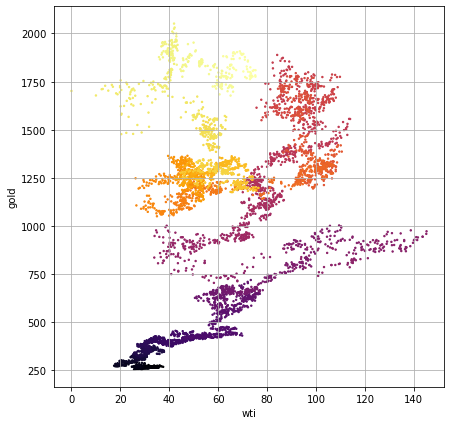

sz_wti
Коэффициент корреляции 0.42563570169371934


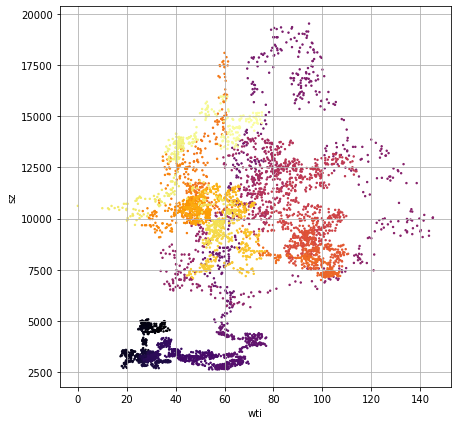

wheat_wti
Коэффициент корреляции 0.8244675819596363


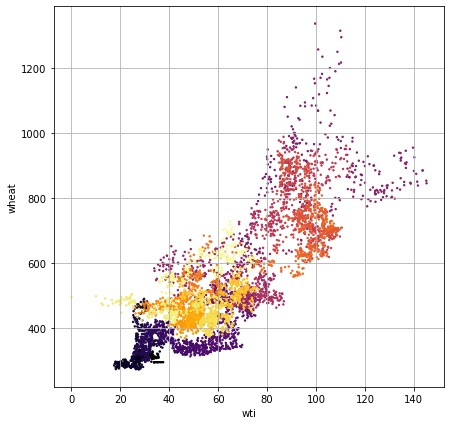

ixic_gold
Коэффициент корреляции 0.6587531633878174


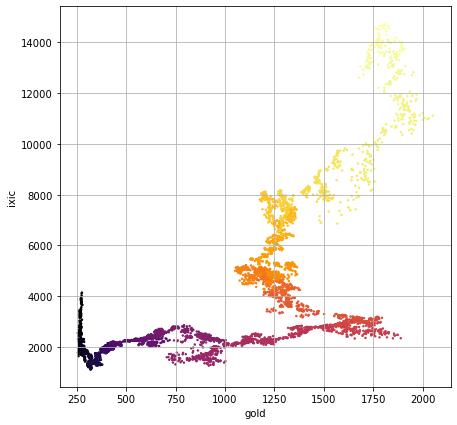

rut_gold
Коэффициент корреляции 0.7054029086008877


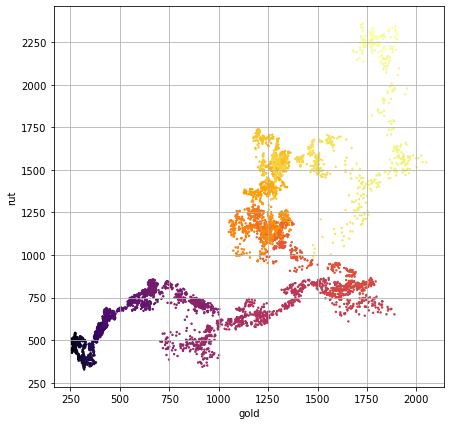

sz_gold
Коэффициент корреляции 0.7075563451704062


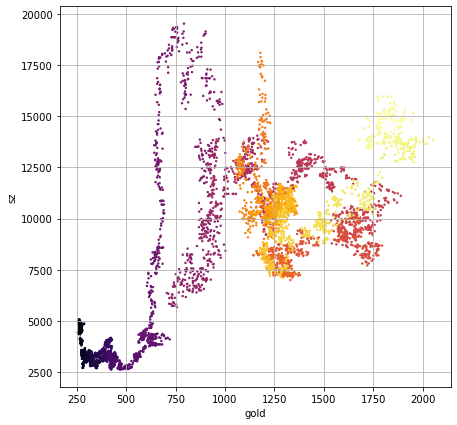

bvsp_gold
Коэффициент корреляции 0.8426356928332008


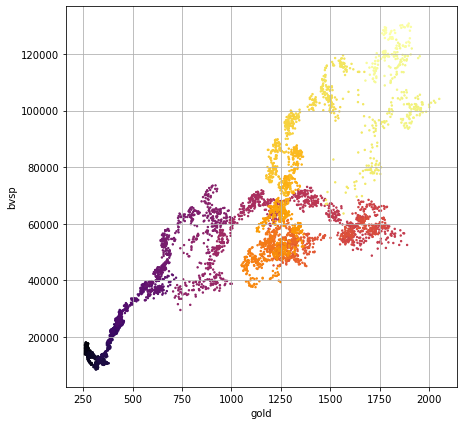

gdaxi_gold
Коэффициент корреляции 0.7044049954757035


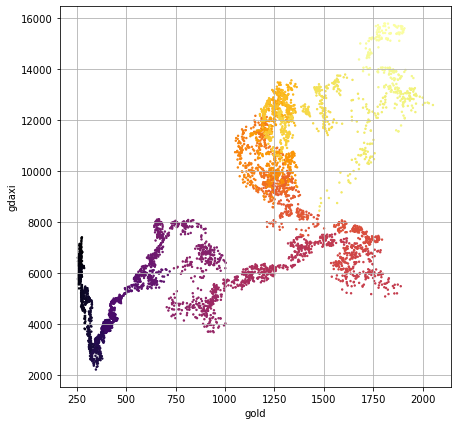

wheat_gold
Коэффициент корреляции 0.5468253020685113


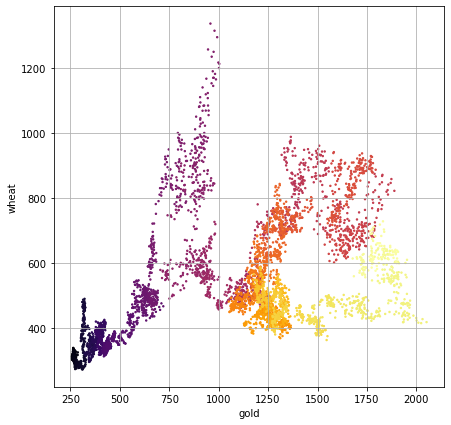

ss_gold
Коэффициент корреляции 0.5011171941455683


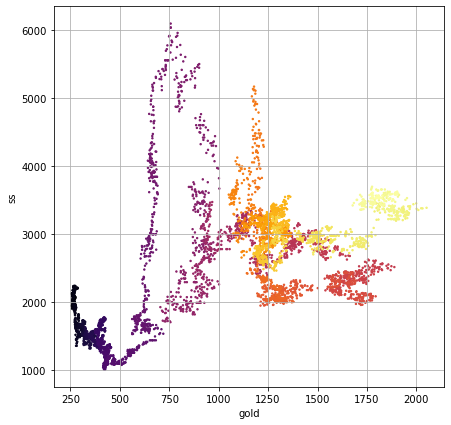

bsesn_gold
Коэффициент корреляции 0.8113888834089303


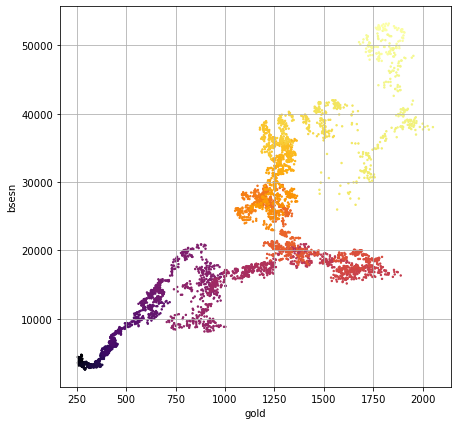

wti/gold_gold
Коэффициент корреляции -0.7439758584588503


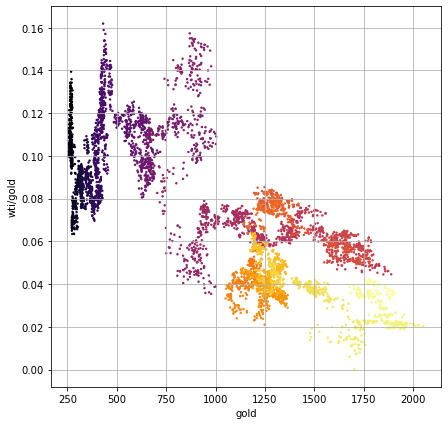

wheat/gold_gold
Коэффициент корреляции -0.8478619817795575


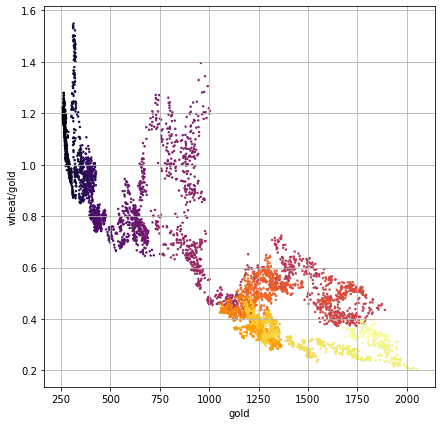

sz_ixic
Коэффициент корреляции 0.4868686530628666


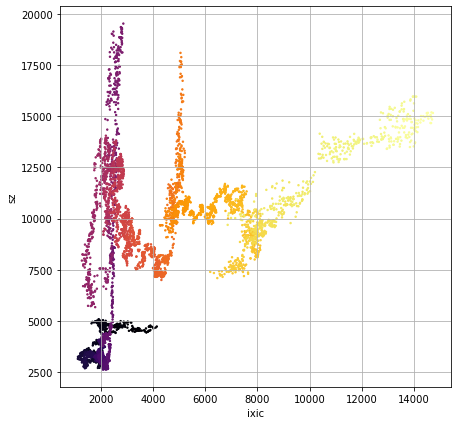

bvsp_ixic
Коэффициент корреляции 0.8227594000426894


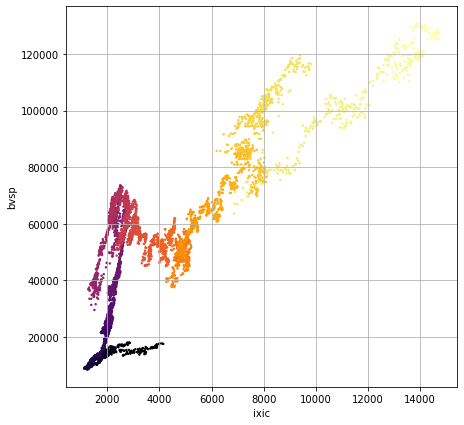

ss_ixic
Коэффициент корреляции 0.46076421889449204


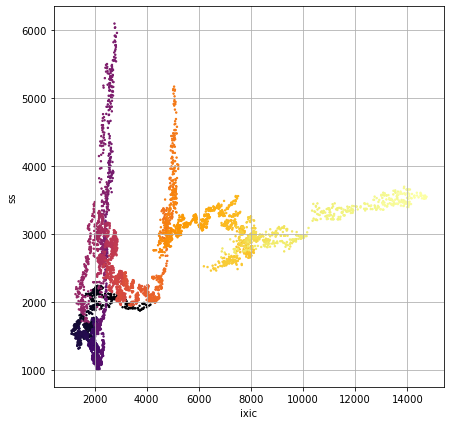

wti/gold_ixic
Коэффициент корреляции -0.6568344074552842


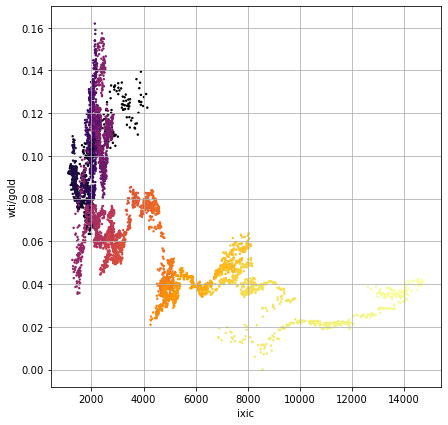

wheat/gold_ixic
Коэффициент корреляции -0.6591537299375464


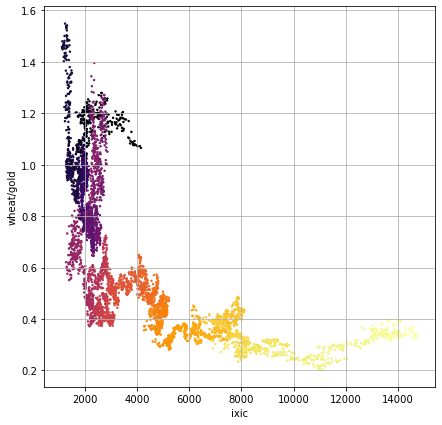

sz_rut
Коэффициент корреляции 0.5366370687558883


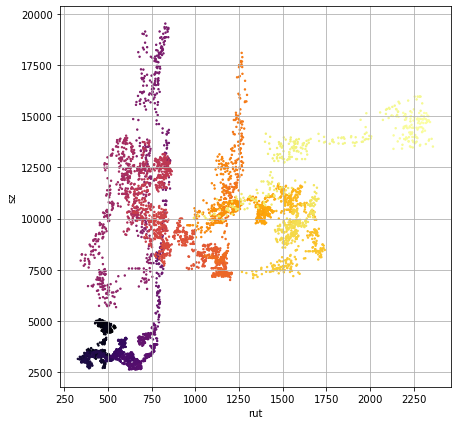

bvsp_rut
Коэффициент корреляции 0.8421363516908504


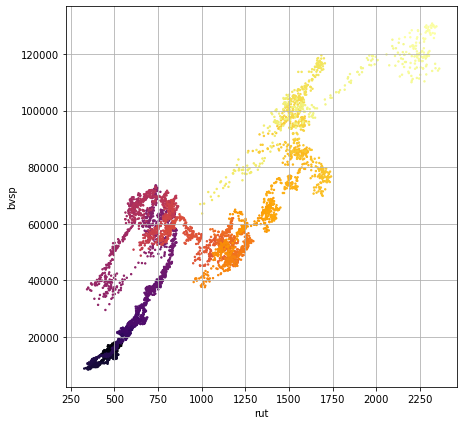

ss_rut
Коэффициент корреляции 0.518650923293071


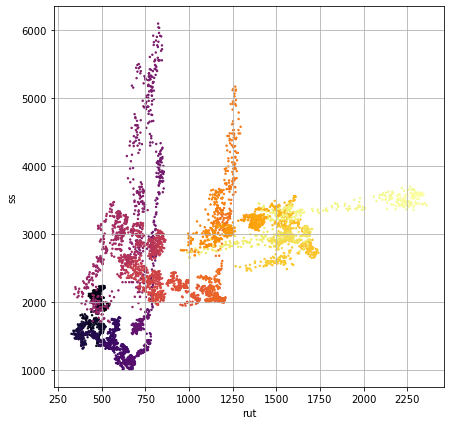

wti/gold_rut
Коэффициент корреляции -0.6496671764537986


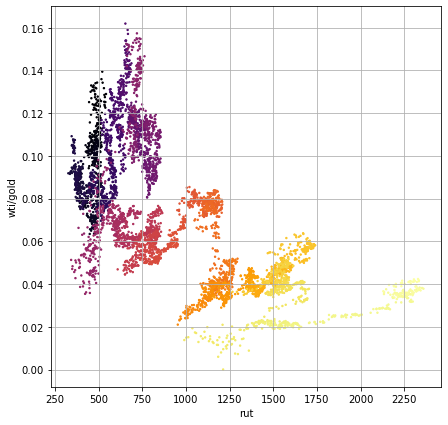

wheat/gold_rut
Коэффициент корреляции -0.7373793921662


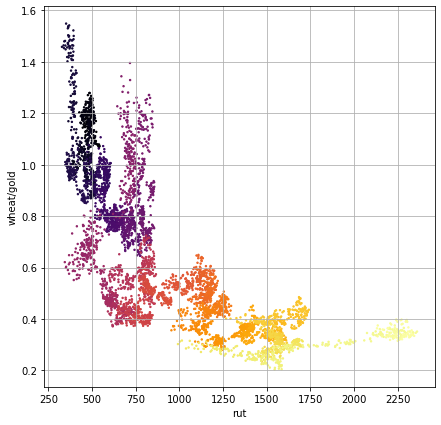

bvsp_sz
Коэффициент корреляции 0.7366020911358064


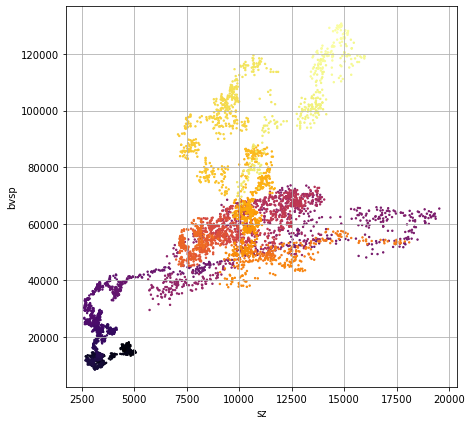

gdaxi_sz
Коэффициент корреляции 0.6129565397367283


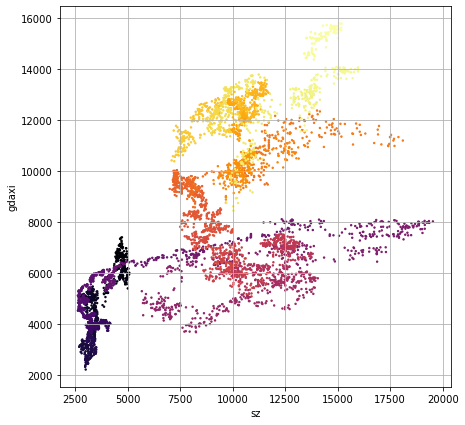

wheat_sz
Коэффициент корреляции 0.5879950186266395


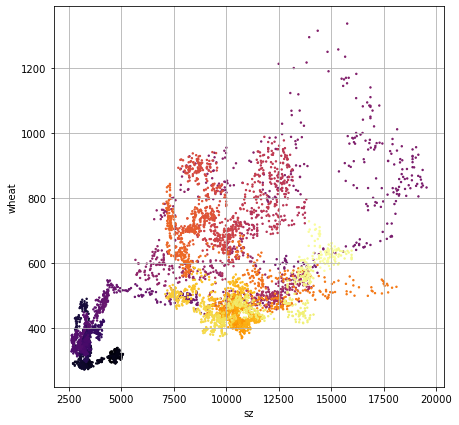

bsesn_sz
Коэффициент корреляции 0.6732938848636102


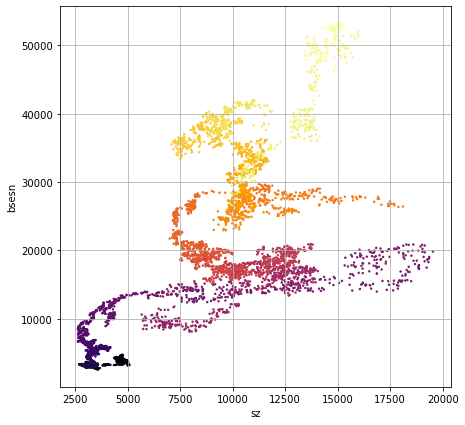

wti/gold_sz
Коэффициент корреляции -0.5021158038694797


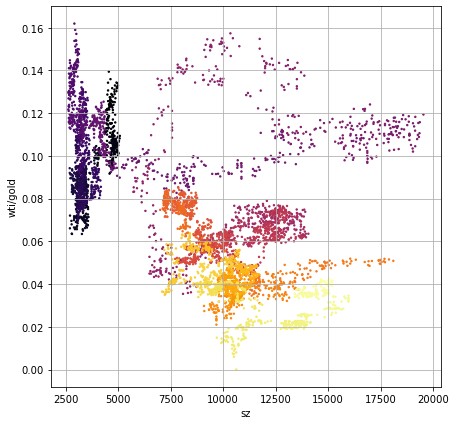

wheat/gold_sz
Коэффициент корреляции -0.5235280449232127


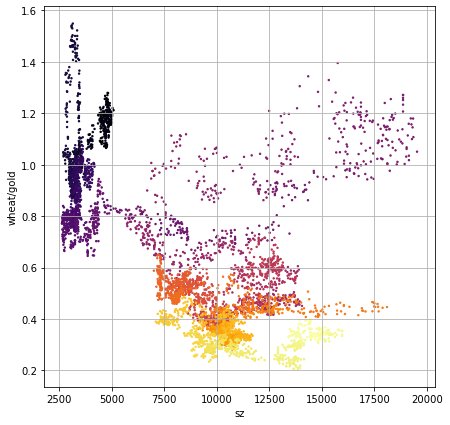

gdaxi_bvsp
Коэффициент корреляции 0.8161050942640958


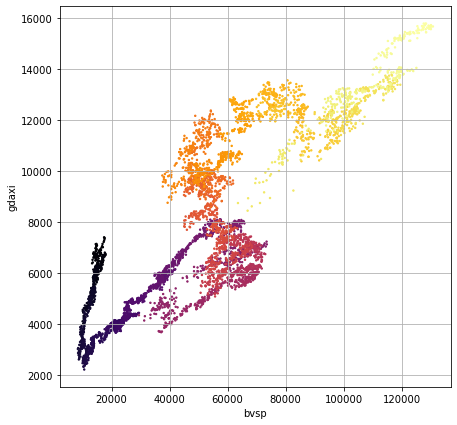

ss_bvsp
Коэффициент корреляции 0.6294821641575185


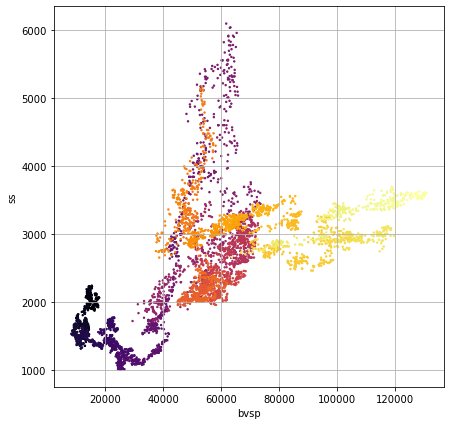

wti/gold_bvsp
Коэффициент корреляции -0.617449915293114


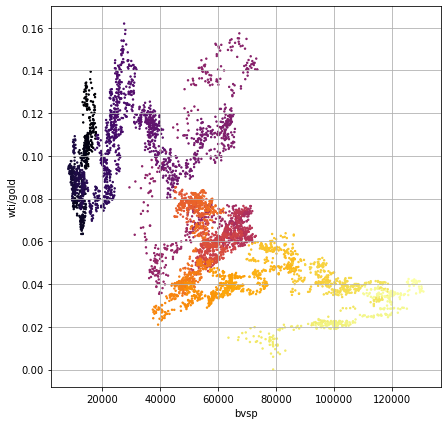

wheat/gold_bvsp
Коэффициент корреляции -0.7596116660473399


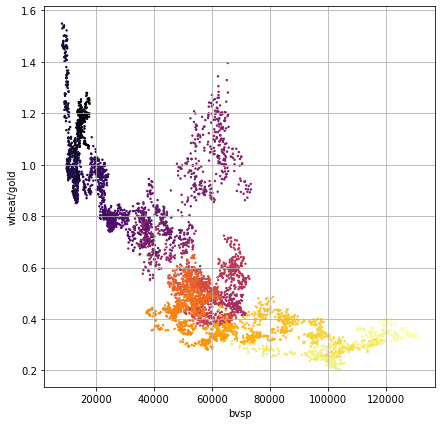

ss_gdaxi
Коэффициент корреляции 0.6253214027333253


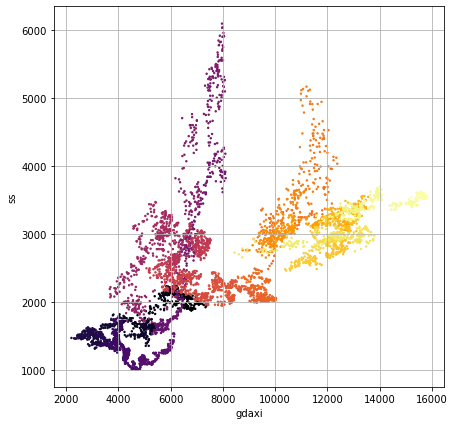

wti/gold_gdaxi
Коэффициент корреляции -0.6735090921481837


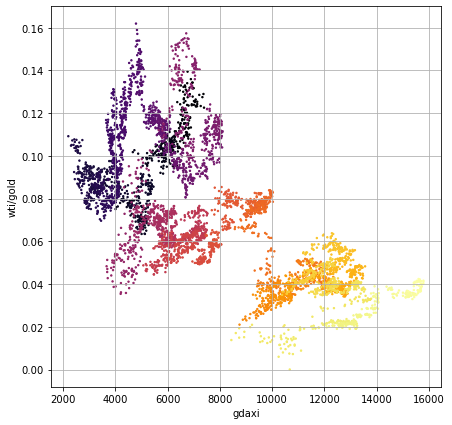

wheat/gold_gdaxi
Коэффициент корреляции -0.7250488168578638


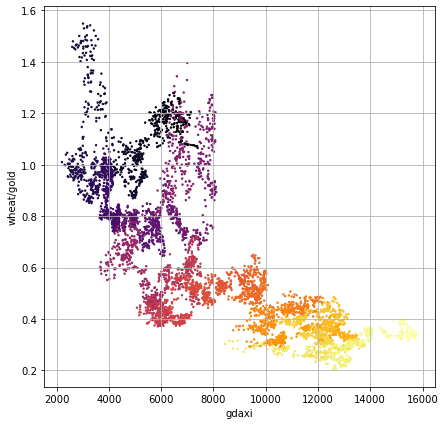

ss_wheat
Коэффициент корреляции 0.4202819232513172


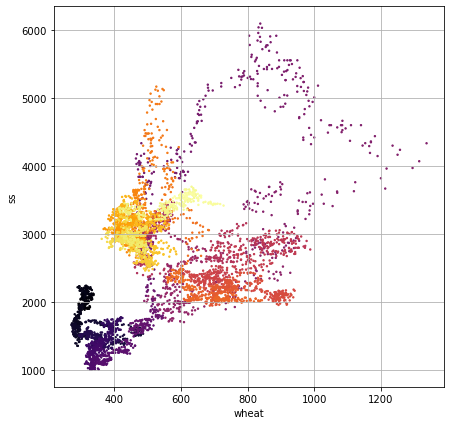

bsesn_ss
Коэффициент корреляции 0.6197833179268301


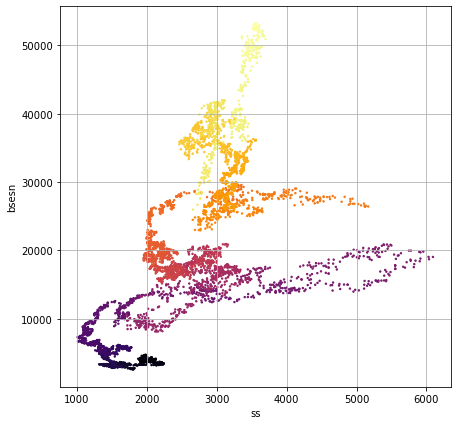

wti/gold_ss
Коэффициент корреляции -0.412650748994722


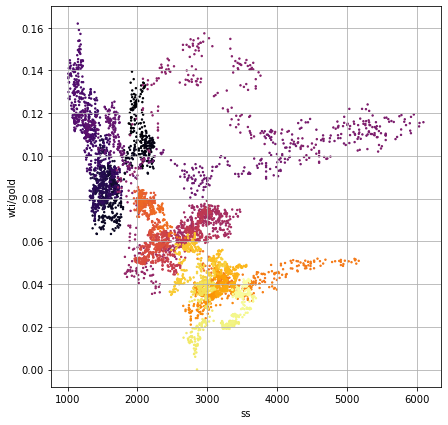

wti/gold_bsesn
Коэффициент корреляции -0.7269663184382529


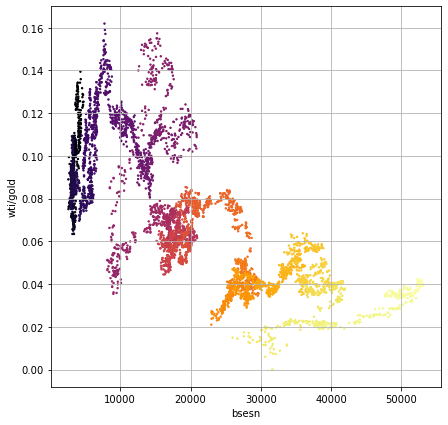

wheat/gold_bsesn
Коэффициент корреляции -0.8054379216089962


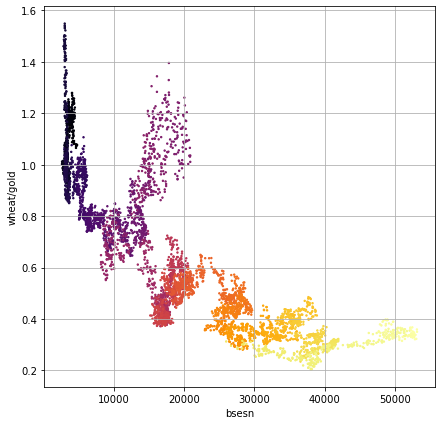

wheat/gold_wti/gold
Коэффициент корреляции 0.7813740124048977


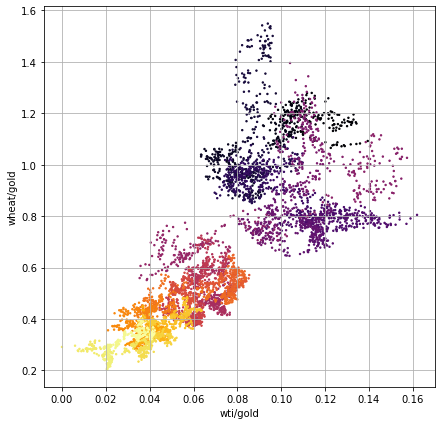

In [26]:
pairs = set()

for i in df.columns:
    for j in df.columns:
        if i != j and (j + '_' + i) not in pairs:
            x = df[i]
            y = df[j]
            xm = np.mean(x)
            ym = np.mean(y)
            R = (np.sum((x - xm)*(y - ym)))/((np.sum((x - xm)**2)*np.sum((y - ym)**2))**(1/2))
            if 0.9 > R > 0.4 or -0.4 > R > -0.9:
                print(j + '_' + i)
                scatter(i, j, False)
                pairs.add(i + '_' + j)

In [21]:
def scatter2(col1, col2, col3):
#     if lin == True:
#         x = df[col1]/df[col1].max()
#         y = df[col2]/df[col2].max()
#     else:
#         x = df[col1]
#         y = df[col2]
        
    x = df[col1]/df[col3]
    y = df[col2]
        
    z = df.index.astype('int')/df.index.astype('int').max()
    color = [float(item) for item in z]
    plt.figure(figsize=(7,7))
#     plt.patch.set_facecolor('xkcd:grey')
    plt.scatter(x, y, s=2, c=color, cmap='inferno')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.grid(True)
    
#     if lin == True:
#         a = (np.sum(x)*np.sum(y) - len(x)*np.sum(x*y))/(np.sum(x)*np.sum(x) - len(x)*np.sum(x*x))
#         b = (np.sum(y) - a*np.sum(x))/len(x)

#         A = np.vstack([x, np.ones(len(x))]).T
#         a1, b1 = np.linalg.lstsq(A, y)[0]
#         print(a, b)
#         print(a1, b1)
#         plt.plot([0, 1], [b, a + b], c='r')
#         plt.show()

    xm = np.mean(x)
    ym = np.mean(y)
    R = (np.sum((x - xm)*(y - ym)))/((np.sum((x - xm)**2)*np.sum((y - ym)**2))**(1/2))
    print('Коэффициент корреляции', R)
    plt.show()